In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loc_values = [0.5,1, 1.5, 2, 2.5, 3, 3.5, 4]

In [3]:
loc_values

[0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4]

In [4]:
def evaluate_once(loc_value):
    loom_file_path =  '../simulated/dropout_present/melanomaS2_sim_loc'+str(loc_value)+'.loom'
    dim_red_results_path = sorted(glob.glob('../analysis/dropout_present/*/melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    cluster_results_path = sorted(glob.glob('../analysis/dropout_present/*/clusters/melanomaS2_sim_loc'+str(loc_value)+'clusters.csv'))
    h5f = h5py.File(loom_file_path, 'r')
    x = h5f['col_attrs']
    cell_groups = x['cell_groups'][:]
    h5f.close()
    vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
    cell_groups = vfunc1(cell_groups)
    vfunc2 = np.vectorize(lambda t: int(t[-1:]))
    cell_groups = vfunc2(cell_groups)
    # cluster results
    cluster_results = []
    for c in cluster_results_path:
        cluster_results.append(np.genfromtxt(c, delimiter=',', dtype=np.int64))   

    results = []
    i = 0
    for cr in cluster_results:
        #print (cluster_results_path[i])
        #print ('nmi')
        i = i + 1
        #print(normalized_mutual_info_score(cell_groups, cr))
        results.append(normalized_mutual_info_score(cell_groups, cr))
    vfunc2 = np.vectorize(lambda t: t.split('/')[3])
    index_list = vfunc2(cluster_results_path)
    print(index_list)
    return pd.Series(results, index=index_list)

In [5]:
index = evaluate_once(0.5).T.index.values

['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']


In [6]:
df = pd.DataFrame(columns=index)
for loc in loc_values:
    df.loc[loc] = evaluate_once(loc)
    #df.append(evaluate_once(loc),ignore_index=True)

['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'pca' 'phenograph' 'simlr' 'tsne']


In [7]:
df

,block_zifa,factor_analysis,pca,phenograph,simlr,tsne
0.5,0.005289,0.001659,0.000476,0.001988,0.000617,0.000378
1.0,0.106610,0.033756,0.001111,0.003285,0.002322,0.000500
1.5,0.135495,0.221811,0.002023,0.009466,0.034496,0.004199
2.0,0.681963,0.647298,0.068863,0.033449,0.509192,0.037620
2.5,0.883552,0.892766,0.305734,0.158356,0.781530,0.179245
3.0,0.956531,0.973956,0.634895,0.400822,0.921644,0.402297
3.5,0.991543,0.978798,0.817532,0.636553,0.975500,0.620118
4.0,1.000000,0.994886,0.903860,0.765349,1.000000,0.767561


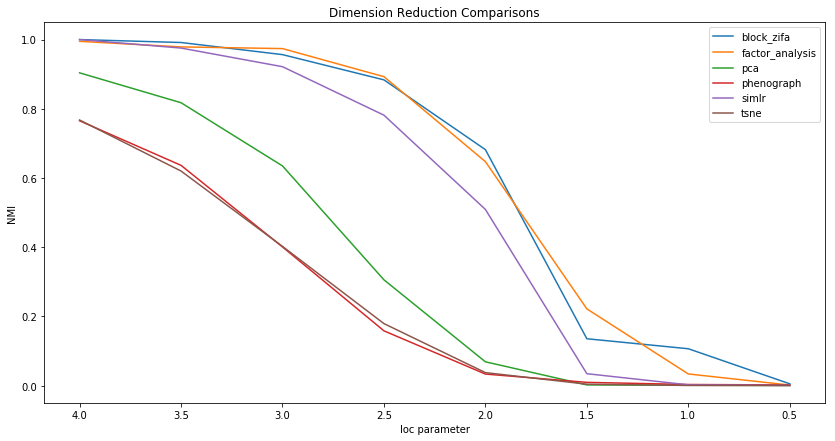

In [8]:
ax = df.plot(title='Dimension Reduction Comparisons',figsize=(14,7))
ax.set_xlabel('loc parameter')
ax.set_ylabel('NMI')
ax.invert_xaxis()